## Importing Libraries

In [95]:
import numpy as np #to calculate mean , std
import pandas as pd #to load, manipulate n one-hot encode the dataset
import matplotlib.pyplot as plt #to plot graphs
from sklearn.model_selection import train_test_split, cross_val_score #do splitting n cross validation
from sklearn.tree import DecisionTreeClassifier, plot_tree #create model n draw tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report #check accuracy

## Loading Data

In [45]:
df = pd.read_csv('processed.cleveland.data', header = None)
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Exploring Data

Data types of each features

In [46]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Finding categorical variables from seeing their unique values.

In [47]:
for col in df.columns:
  print (col)
  print (df[col].unique())
  print ()

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]

sex
[1. 0.]

cp
[1. 4. 3. 2.]

restbp
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]

chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 

1.   Already in binary(0/1) are: sex, fbs, exang
2.   also converting hd to binary
3.   in categories are: cp, restecg, slope, ca, thal
4.   Note: ca, thal has missing values - '?'


## Cleaning Data

Handling missing values:

In [73]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

out of 303 rows we have missing value only in 6 rows
 > Missing percentage: ( 6/303 )*100 = 1.98% , so we decide to drop th rows with missing values

In [83]:
df.drop(df.index[(df['ca'] == '?') | (df['thal'] == '?')], inplace = True)

Encoding target variable - Heart Disease - Present or Absent

In [57]:
df['hd'].loc[df['hd'] > 0] = 1
df['hd'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([0, 1])

One-hot encoding can be done using:

1.   scikit-learn - ColumnTransformer -> more good perisitent than get_dummies( )
2.   pandas - get_dummies( )

> Drawback in ColumnTransformer is it converts the features into arrays hence losing the dataframe and its column names in the process.

> get_dummies( ) retains the dataframe shape but isn't that effective as ColumnTransformer









In [85]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'ca', 'thal'])
print (X_encoded.head())

    age  sex  restbp   chol  fbs  ...  ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0
0  63.0  1.0   145.0  233.0  1.0  ...       0       0         0         1         0
1  67.0  1.0   160.0  286.0  0.0  ...       0       1         1         0         0
2  67.0  1.0   120.0  229.0  0.0  ...       1       0         0         0         1
3  37.0  1.0   130.0  250.0  0.0  ...       0       0         1         0         0
4  41.0  0.0   130.0  204.0  0.0  ...       0       0         1         0         0

[5 rows x 25 columns]


## Splitting the dataset - Train, Test, Split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 30)


## Model

In [92]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(383.8029336734694, 513.4, 'thal_3.0 <= 0.5\ngini = 0.5\nsamples = 222\nvalue = [114, 108]\nclass = No HD'),
 Text(160.14030612244898, 453.0, 'ca_0.0 <= 0.5\ngini = 0.36\nsamples = 102\nvalue = [24, 78]\nclass = Yes HD'),
 Text(68.3265306122449, 392.6, 'age <= 61.5\ngini = 0.098\nsamples = 58\nvalue = [3, 55]\nclass = Yes HD'),
 Text(51.244897959183675, 332.2, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]\nclass = Yes HD'),
 Text(85.40816326530611, 332.2, 'cp_3.0 <= 0.5\ngini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = Yes HD'),
 Text(51.244897959183675, 271.8, 'oldpeak <= 0.4\ngini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = Yes HD'),
 Text(34.16326530612245, 211.39999999999998, 'ca_1.0 <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes HD'),
 Text(17.081632653061224, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes HD'),
 Text(51.244897959183675, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HD'),
 Text(68.3265306122449, 211.39999999999

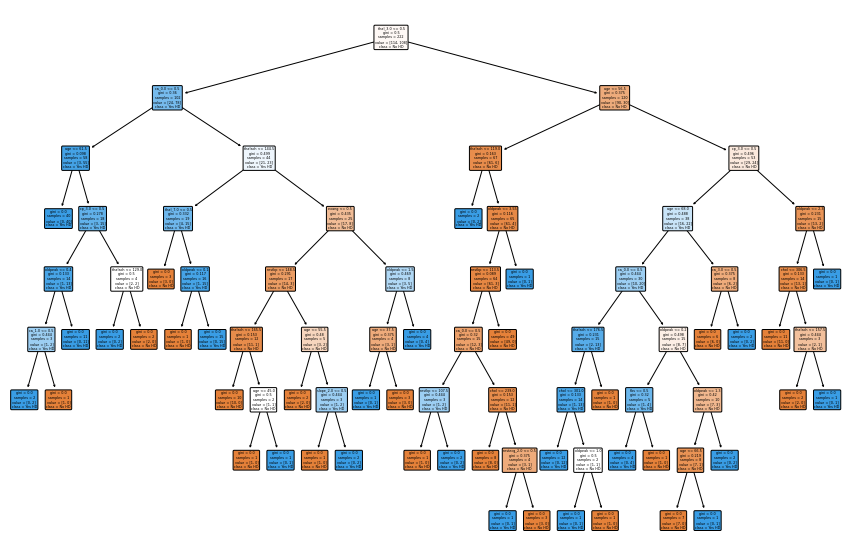

In [93]:
plt.figure(figsize = (15,10) )
plot_tree(model, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names=X_encoded.columns)

## Metrics

Confusion Matrix

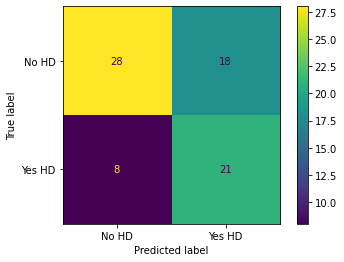

In [94]:
plot_confusion_matrix(model, X_test, y_test, display_labels=['No HD', 'Yes HD'])

Classification Report

In [103]:
print (classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68        46
           1       0.54      0.72      0.62        29

    accuracy                           0.65        75
   macro avg       0.66      0.67      0.65        75
weighted avg       0.69      0.65      0.66        75



## Cost Complexity Pruning

- alpha determines the pruning level

Decision trees are prone to overfit, so it is essential to prune them. There are lot of hyperparameters - Cost complexity pruning makes it simple n fast.

In [105]:
path = model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00412913, 0.00412913, 0.00418275, 0.00418275,
        0.00418275, 0.00466643, 0.00575452, 0.00583396, 0.00675676,
        0.00720721, 0.00725011, 0.00725011, 0.00788288, 0.0080583 ,
        0.00844595, 0.00927177, 0.00999735, 0.01081081, 0.01169591,
        0.01539496, 0.0192395 , 0.02000356, 0.02143584, 0.03518232,
        0.04081839, 0.13159025]),
 'impurities': array([0.        , 0.00825826, 0.01651652, 0.02488202, 0.03324753,
        0.04161304, 0.05561234, 0.0728759 , 0.09037778, 0.09713454,
        0.10434174, 0.11159185, 0.11884196, 0.12672484, 0.13478314,
        0.14322909, 0.16177263, 0.18176733, 0.19257814, 0.21596995,
        0.23136491, 0.25060441, 0.27060797, 0.2920438 , 0.32722613,
        0.36804452, 0.49963477])}

In [113]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #excluding the max alpha value -> coz max alpha prunes all leaves leaving us only with the root

#creating one DT for each alpha and storing it in a array
ccp_dt = []
for a in ccp_alphas:
  dt = DecisionTreeClassifier(random_state = 30, ccp_alpha = a)
  dt.fit(X_train, y_train)
  ccp_dt.append(dt)

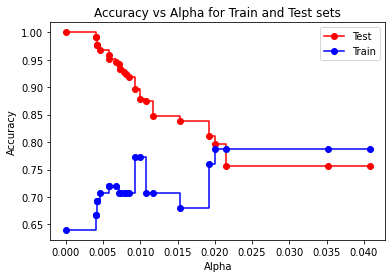

In [114]:
#calculating accuracy for each model - for both Train n Test set
test_accu = [dt.score(X_train, y_train) for dt in ccp_dt]
train_accu = [dt.score(X_test, y_test) for dt in ccp_dt]

plt.plot(ccp_alphas, test_accu, marker = 'o', c = 'r', label = 'Test', drawstyle = 'steps-post')
plt.plot(ccp_alphas, train_accu, marker = 'o', c = 'b', label = 'Train', drawstyle = 'steps-post')
plt.title('Accuracy vs Alpha for Train and Test sets')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.legend()
plt.show()

- The accuracy of Test Set hits maximum at alpha=0.19 and after that the accuracy of Train Set starts falling.

- Alpha value for classifier ranges from 0-1, Gini impurity also ranges from 0-1, **Note:**Alpha value for Regression DT can be above 1 taking the Sum of Sq.Residuals into account

## Cross Validation

Done with pruning we have to decide the best way to split the data to create a better model  -- finding optimal split.

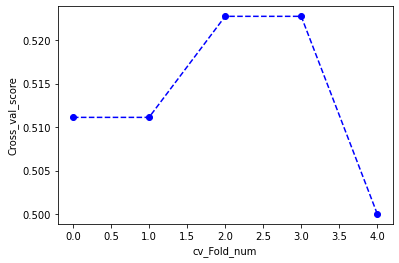

In [118]:
final_DT = DecisionTreeClassifier(random_state=30, ccp_alpha=0.19)
cross_score = cross_val_score(final_DT, X_train, y_train, cv = 5)
plt.plot(range(5), cross_score, marker = 'o', c = 'b', ls = '--')
plt.ylabel('Cross_val_score')
plt.xlabel('cv_Fold_num')
plt.show()

The graph above makes us understand that for **same alpha**, **different datasets** results in different accuracy.

Let's find optimal alpha for the optimal dataset using cross validation 

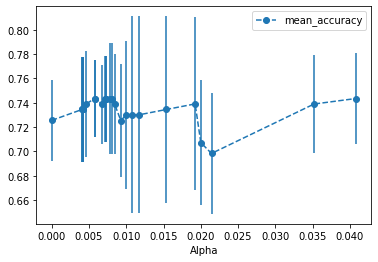

In [119]:
alpha = []

for a in ccp_alphas:
  dt = DecisionTreeClassifier(random_state = 30, ccp_alpha = a)
  score = cross_val_score(dt, X_train, y_train, cv=5)
  alpha.append([a, np.mean(score), np.std(score)])

df_alpha = pd.DataFrame(alpha, columns = ['Alpha', 'mean_accuracy', 'std_accuracy'])
df_alpha.plot(x = 'Alpha', y = 'mean_accuracy', yerr = 'std_accuracy', marker = 'o', ls = '--')
##See pandas.DataFrame.plot() for reference

from the above graph we try to find the optimal alpha for highest accuracy

In [123]:
ccp_alphas[(ccp_alphas > 0.015) & (ccp_alphas < 0.020) ]

[0.01539496 0.0192395 ]


Therefore, Alpha = 0.0192395

## Building Final Decision Tree Model

In [126]:
model_pruned = DecisionTreeClassifier(random_state = 30, ccp_alpha=0.0192395)
model_pruned.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0192395, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

[Text(418.5, 342.46799999999996, 'thal_3.0 <= 0.5\ngini = 0.5\nsamples = 222\nvalue = [114, 108]\nclass = No HD'),
 Text(209.25, 266.364, 'ca_0.0 <= 0.5\ngini = 0.36\nsamples = 102\nvalue = [24, 78]\nclass = Yes HD'),
 Text(104.625, 190.26, 'gini = 0.098\nsamples = 58\nvalue = [3, 55]\nclass = Yes HD'),
 Text(313.875, 190.26, 'thalach <= 144.5\ngini = 0.499\nsamples = 44\nvalue = [21, 23]\nclass = Yes HD'),
 Text(209.25, 114.156, 'thal_6.0 <= 0.5\ngini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(104.625, 38.051999999999964, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = Yes HD'),
 Text(313.875, 38.051999999999964, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(418.5, 114.156, 'gini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = No HD'),
 Text(627.75, 266.364, 'age <= 56.5\ngini = 0.375\nsamples = 120\nvalue = [90, 30]\nclass = No HD'),
 Text(523.125, 190.26, 'gini = 0.163\nsamples = 67\nvalue = [61, 6]\nclass = No HD'),
 Text(732.375, 190.2

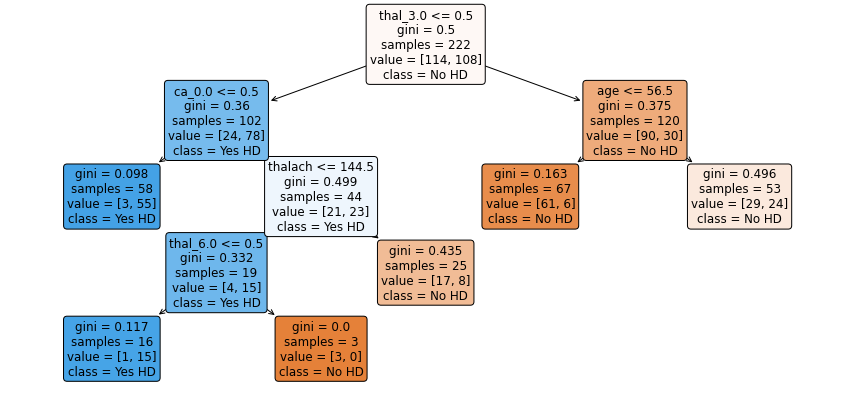

In [133]:
plt.figure(figsize = (15,7) )
plot_tree(model_pruned, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names=X_encoded.columns)

In [127]:
y_pred = model_pruned.predict(X_test)

**Metrics**

Confusion Matrix

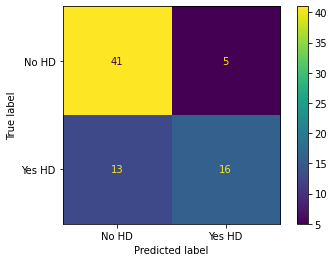

In [130]:
plot_confusion_matrix(model_pruned, X_test, y_test, display_labels=['No HD', 'Yes HD'] )

Classification Report

In [132]:
print (classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        46
           1       0.76      0.55      0.64        29

    accuracy                           0.76        75
   macro avg       0.76      0.72      0.73        75
weighted avg       0.76      0.76      0.75        75

